In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Embedding, Dense, SimpleRNN, LSTM, Bidirectional, Flatten,Dropout
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2, l1_l2

In [11]:
# 1 .데이터 로드
ids = movie_reviews.fileids()
reviews = [movie_reviews.raw(id) for id in ids]
categoris = [movie_reviews.categories(id)[0] for id in ids]
# 토큰화 및 정수 인코딩
max_word = 10000
tokenizer = Tokenizer(num_words=max_word, oov_token='UNK')
tokenizer.fit_on_texts(reviews)
# 텍스트를 시퀀스로 변환
x = tokenizer.texts_to_sequences(reviews)
# 시퀀스 패딩
maxlen = 500
x = pad_sequences(x,maxlen=maxlen,truncating='pre')
# 레이블 변환
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categoris])
# 학습 테스트 데이터 분할
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y, random_state=42,test_size=0.2)

In [12]:
# 2 .세가지 모델 구축 , 학습
# 시드고정(재현성)
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ------ model 1 baseline(Flatten + Dense)
model1 = Sequential([
    Embedding(max_word,32,input_length = maxlen),
    Flatten(),   
    Dropout(0.5) ,
    Dense(1,activation='sigmoid')
])
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history1 = model1.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model1.evaluate(x_test,y_test)
results['baseline'] = score1[1]
print(f'model1 정확도:{score1[1]:.4f}')

# ------ model 2 (SimpleRnn)
model2 = Sequential([
    Embedding(max_word,32,input_length = maxlen),
    SimpleRNN(32),
    Dense(32,activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history2 = model2.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model2.evaluate(x_test,y_test)
results['Simple_RNN'] = score1[1]
print(f'model2 정확도:{score1[1]:.4f}')

# ------ model 3 (Bidirectional LSTM)
model3 = Sequential([
    Embedding(max_word,64,input_length = maxlen),
    Bidirectional(LSTM(64)),    
    Dense(64,activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])
history3 = model3.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
score1 = model3.evaluate(x_test,y_test)
results['Bidirectional_LSTM'] = score1[1]
print(f'model3 정확도:{score1[1]:.4f}')

Epoch 1/10


c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.5109 - loss: 0.6937 - val_acc: 0.5156 - val_loss: 0.6916
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9156 - loss: 0.6237 - val_acc: 0.5625 - val_loss: 0.6876
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9617 - loss: 0.5351 - val_acc: 0.5938 - val_loss: 0.6782
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9836 - loss: 0.4163 - val_acc: 0.6062 - val_loss: 0.6657
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9953 - loss: 0.2938 - val_acc: 0.6406 - val_loss: 0.6505
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9977 - loss: 0.1926 - val_acc: 0.6344 - val_loss: 0.6356
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9984 - loss: 0.1279 - val_acc: 0.6562 - val_loss: 0.6238
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9992 - loss: 0.0875 - val_acc: 0.6469 - val_loss: 0.6143
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 1.0000 - loss: 0.0603 - 

In [13]:
history3.history

{'acc': [0.5101562738418579,
  0.574999988079071,
  0.7328125238418579,
  0.8804687261581421,
  0.953906238079071,
  0.9750000238418579,
  0.9828125238418579,
  0.9937499761581421,
  0.9976562261581421,
  0.9984375238418579],
 'loss': [1.3128520250320435,
  0.9807392954826355,
  0.7681525349617004,
  0.41974949836730957,
  0.20430150628089905,
  0.14911554753780365,
  0.10374857485294342,
  0.06645388901233673,
  0.061752576380968094,
  0.0439273864030838],
 'val_acc': [0.5375000238418579,
  0.5625,
  0.625,
  0.778124988079071,
  0.671875,
  0.7124999761581421,
  0.746874988079071,
  0.721875011920929,
  0.778124988079071,
  0.731249988079071],
 'val_loss': [1.1081335544586182,
  0.8755906224250793,
  0.745983898639679,
  0.6075131893157959,
  0.8915027379989624,
  0.718662440776825,
  0.8680931925773621,
  0.9919387102127075,
  0.9545084834098816,
  0.9609580039978027]}

 Bidirectional_LSTM : 0.7025
 baseline : 0.6500
 Simple_RNN : 0.5725


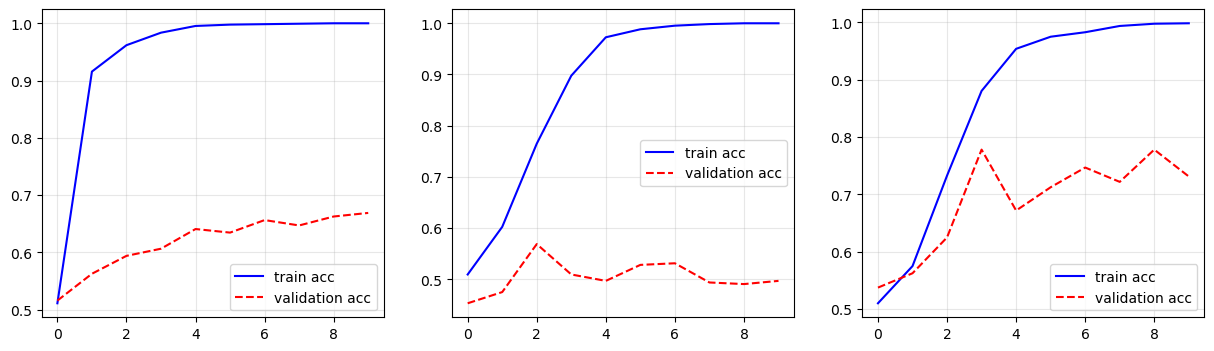

In [14]:
# 3 .성능 비교 및 시각화
for modelname, acc in  sorted(results.items(), key =lambda x : x[1],reverse=True):
    print(f' {modelname} : {acc:.4f}')

fig,ax =  plt.subplots(1,3,figsize=(15,4))
# baseline
ax[0].plot(history1.history['acc'], 'b-', label='train acc')
ax[0].plot(history1.history['val_acc'], 'r--', label='validation acc')
ax[0].legend()
ax[0].grid(True,alpha=0.3)
# SmpleRnn
ax[1].plot(history2.history['acc'], 'b-', label='train acc')
ax[1].plot(history2.history['val_acc'], 'r--', label='validation acc')
ax[1].legend()
ax[1].grid(True,alpha=0.3)
# Bidirectional_LSTM
ax[2].plot(history3.history['acc'], 'b-', label='train acc')
ax[2].plot(history3.history['val_acc'], 'r--', label='validation acc')
ax[2].legend()
ax[2].grid(True,alpha=0.3)

In [15]:
# 4 .예측 결과 분석


In [16]:
# 5 .학습결과 해석
